# Portada
**Nombre de la entrega:** Transformación y reducción de dimensiones

**Nombre:** Enrique Ricardo García Hernández

**Matrícula:** A01315428

**Materia:** Ciencia y Analítica de datos

 **Profesor:** Jobish Vallikavungal Devassia
 
 **Fecha:** 27 de octubre 2022

# Bienvenido al notebook
#Repaso de Reducción de dimensiones
El objetivo es que entendamos de una manera visual, que es lo que pasa cuando nosotros seleccionamos cierto número de componentes principales o % de variabilidad  de una base de datos.

Primero entenderemos, que pasa adentro de PCA que se basa en lo siguiente a grandes razgos:

**Análisis de Componentes Principales**

El análisis de datos multivariados involucra determinar transformaciones lineales que ayuden
a entender las relaciones entre las características importantes de los datos. La idea central del Análisis de Componentes Principales (PCA) es reducir las dimensiones de un conjunto de datos que presenta variaciones correlacionadas, reteniendo una buena proporción de la variación presente en dicho conjunto. Esto se logra obteniendo la transformación a un nuevo conjunto de variables: los componentes principales (PC). Cada PC es una combinación lineal con máxima varianza en dirección ortogonal a los demás PC.


![title](https://miro.medium.com/max/720/1*XGaA7KWUlhWZLIezYEBIHA.gif)


Para entender un poco más de PCA y SVD, visita el siguiente link:
*Truco: Prueba entrar con tu cuenta del tec :)*

https://towardsdatascience.com/pca-and-svd-explained-with-numpy-5d13b0d2a4d8


Basicamente, vamos a seguir los siguientes pasos:

1. Obtener la covarianza. OJO: X tiene sus datos centrados :)

![title](https://miro.medium.com/max/194/1*92t9OuqxIG0YpJXsNNgI4A.png)

2. Los componentes principales se van a obtener de la eigen descomposicion de la matriz de covarianza.

![title](https://miro.medium.com/max/260/1*c1S0_26A8RxEQQUVyMp5Vw.png)

3. Para la reducción de dimensiones vamos a seleccionar k vectores de W y proyectaremos nuestros datos.

![title](https://miro.medium.com/max/214/1*jnj2YMpWIApnCzxRU_zjfg.png)

![title](https://miro.medium.com/max/720/1*ba0XpZtJrgh7UpzWcIgZ1Q.jpeg)






# Ejercicio 1, Descomposición y composición
***Descomposición***

Encuentra los eigenvalores y eigenvectores de las siguientes matrices

$A = \begin{pmatrix} 3,0,2 \\ 3,0,-2 \\ 0,1,1 \end{pmatrix}$
$A2 = \begin{pmatrix} 1,3,8 \\ 2,0,0 \\ 0,0,1 \end{pmatrix}$
$A3 = \begin{pmatrix} 5,4,0 \\ 1,0,1 \\ 10,7,1 \end{pmatrix}$

y reconstruye la matriz original a traves de las matrices 
$WDW^{-1}$ (OJO. Esto es lo mismo de la ecuación del paso 2 solo le cambiamos la variable a la matriz diagonal)




# Eigenvalores y eigenvectores

In [10]:
###-----------------EJEMPLO DE EIGENVALORES
import numpy as np
from numpy import array
from numpy.linalg import eig
# define la matriz
A = array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print("-------Matriz original-------")
print(A)
print("-----------------------------")
# calcula la eigendescomposición
values, vectors = eig(A)
print(values) #D
print(vectors) #W

#Ejemplo de reconstrucción


values, vectors = np.linalg.eig(A)

W = vectors
Winv = np.linalg.inv(W)
D = np.diag(values)
#la matriz B tiene que dar igual a A
#reconstruye la matriz 
print("-------Matriz reconstruida-------")
# Realiza la reconstruccion de B=W*D*Winv, te da lo mismo de A?
#ojo, estas multiplicando matrices, no escalares ;)
#TU CODIGO AQUI-------------------------------------
B=np.dot(np.dot(W,D),Winv)
print(B)
print("El resultado de la matriz B: \n",B ,"\n\n es igual a la matriz A: \n",A)
print("-----------------------------")

-------Matriz original-------
[[1 2 3]
 [4 5 6]
 [7 8 9]]
-----------------------------
[ 1.61168440e+01 -1.11684397e+00 -1.30367773e-15]
[[-0.23197069 -0.78583024  0.40824829]
 [-0.52532209 -0.08675134 -0.81649658]
 [-0.8186735   0.61232756  0.40824829]]
-------Matriz reconstruida-------
[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]
El resultado de la matriz B: 
 [[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]] 

 es igual a la matriz A: 
 [[1 2 3]
 [4 5 6]
 [7 8 9]]
-----------------------------


In [19]:
A = array([[3, 0, 2], [3, 0, -2], [0, 1, 1]])
values, vectors = eig(A)
print(values) #D
print(vectors) #W

[3.54451153+0.j         0.22774424+1.82582815j 0.22774424-1.82582815j]
[[-0.80217543+0.j         -0.04746658+0.2575443j  -0.04746658-0.2575443j ]
 [-0.55571339+0.j          0.86167879+0.j          0.86167879-0.j        ]
 [-0.21839689+0.j         -0.16932106-0.40032224j -0.16932106+0.40032224j]]


In [141]:
#Matriz 1
#Reconstrucción de la matriz A
values, vectors = np.linalg.eig(A)
#La librería linalg se utiliza para álgebra lineal con matrices y vectores
#El método linalg.eig(A). Toma la matriz cuadrada A y devuelve dos valores,
#El primero (W) está compuesta por los vectores propios de la matriz cuadrada A. El vector propio es la tranformación lineal de los componentes originales
#El segundo (D) son los valores propios de la matriz, que es el escalar por el que ha sido multiplicada la matriz W
#La matriz inversa de W

W = vectors
Winv = np.linalg.inv(W)
D = np.diag(values)

#Matriz reconstruida B
#Para la reconstrucción de la matriz A a partir de la multiplicación matricial la matriz W (compuesta por los vectores propios de la matriz original) * el valor propio * Inverso de la matriz W
B=np.round(np.dot(np.dot(W,D),Winv))
print(B)

[[ 3.+0.j  0.-0.j  2.-0.j]
 [ 3.-0.j  0.+0.j -2.+0.j]
 [ 0.+0.j  1.-0.j  1.+0.j]]


In [54]:
#Matriz 2
A2=array([[1,3,8],[2,0,0],[0,0,1]])
print("Matriz A2: \n",A2)
#Reconstrucción de la matriz 2
values, vectors = np.linalg.eig(A2)

W2 = vectors
W2inv = np.linalg.inv(W2)
D2 = np.diag(values)

#Matriz reconstruida B2
B2=np.round(np.dot(np.dot(W2,D2),W2inv))
print("Matriz reconstruida B2: \n",B2)

Matriz A2: 
 [[1 3 8]
 [2 0 0]
 [0 0 1]]
Matriz reconstruida B2: 
 [[1. 3. 8.]
 [2. 0. 0.]
 [0. 0. 1.]]


In [55]:
#Matriz 3
A3=array([[5,4,0],[1,0,1],[10,7,1]])
print("Matriz A3: \n",A3)
#Reconstrucción de la matriz 3
values, vectors = np.linalg.eig(A3)

W3 = vectors
W3inv = np.linalg.inv(W3)
D3 = np.diag(values)

#Matriz reconstruida B3
B3=np.round(np.dot(np.dot(W3,D3),W3inv))
print("Matriz reconstruida B3: \n",B3)

Matriz A3: 
 [[ 5  4  0]
 [ 1  0  1]
 [10  7  1]]
Matriz reconstruida B3: 
 [[ 5.  4. -0.]
 [ 1. -0.  1.]
 [10.  7.  1.]]


**¿Qué significa  reducir dimensiones?**

Esto será cuando proyectemos a ese espacio de los componentes principales pero no los seleccionemos todos, solo los más importantes y viajemos de regreso a nuestras unidades a través de una proyección.

Es decir:
Unidades-PC
PC-Unidades

Veamoslo gráficamente, ¿qué pasa con esa selección de los PCs y su efecto?.


Para ello usaremos Singular Value Descomposition (SVD).



# Singular Value Descomposition(SVD)

Es otra descomposición que tambien nos ayudara a reducir dimensiones.

<img src="https://miro.medium.com/max/720/1*6wkgGgBy2NLVmRVOw8K86w.png" width="300">



#Ejercicio 2
Juega con Lucy, una cisne, ayudala a encontrar cuantos valores singulares necesita para no perder calidad a través de SVD. Posteriormente usa 3 imágenes de tu preferencia y realiza la misma acción :D

A esto se le llama **compresión de imagenes** :o

[72. 73. 74. ... 48. 47. 47.]


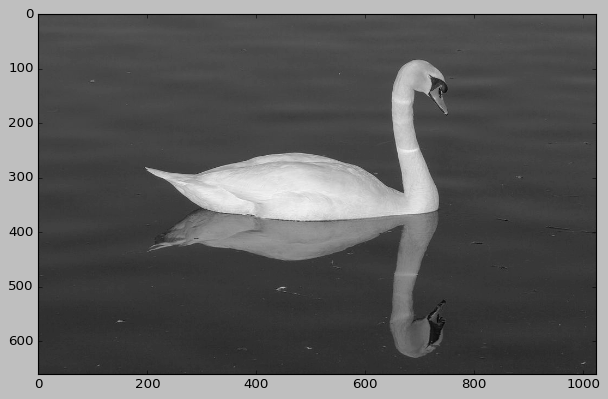

<PIL.Image.Image image mode=LA size=1024x660 at 0x7F8C82A63CD0>


In [70]:
from six.moves import urllib
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('classic')
img = Image.open(urllib.request.urlopen('https://biblioteca.acropolis.org/wp-content/uploads/2015/03/Cisne.jpg')).convert('LA')
#img = Image.open('lucy.jpg')
imggray = img.convert('LA')
imgmat = np.array(list(imggray.getdata(band=0)),float)

print(imgmat)

imgmat.shape = (imggray.size[1],imggray.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat,cmap='gray')
plt.show()
print(img)

In [57]:
U,D,V = np.linalg.svd(imgmat)
imgmat.shape


(660, 1024)

In [58]:
U.shape

(660, 660)

In [59]:
V.shape

(1024, 1024)

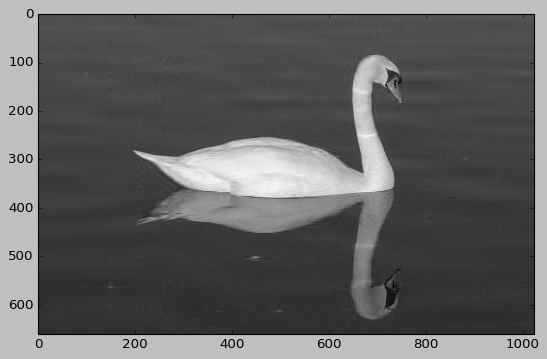

Felicidades la imagen está comprimida


In [66]:
#Cuantos valores crees que son necesarios?
#A=U*D*V
#aqui los elegiremos---------------------------
# por las dimensiones de este caso en particular 
#iremos de 0-660, siendo 660 como normalmente están los datos
#con 50 podemos observar que Lucy se ve casi igual, es decir conservamos aquello que en 
# realidad estaba aportando a la imagen en este caso :D por medio de la variabilidad 
#juega con el valor nvalue y ve que pasa con otros valores
nvalue = 50
#------------------------------
reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])
#ve las dimensiones de la imagen y su descomposicion
#660x1024= U(660X660)D(660X1024)V(1024x1024)
        #=U(660Xnvalues)D(nvaluesXnvalue)V(nvaluesx1024)

        #=U(660X50)(50X50)(50X1024)
plt.imshow(reconstimg,cmap='gray')
plt.show()
print("Felicidades la imagen está comprimida")

¡Ahora es tu turno!, comprime 3 imagenes

[113. 112. 111. ... 120. 120. 120.]


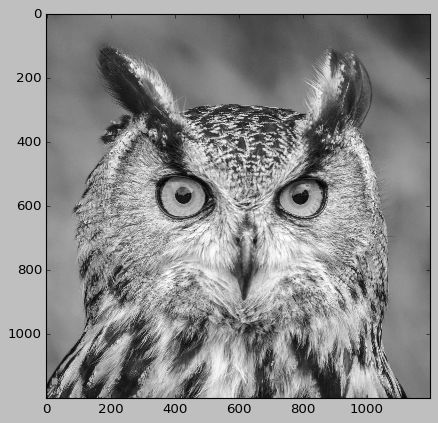

<PIL.Image.Image image mode=LA size=1200x1200 at 0x7F8C756AAC10>
Buho observando de lejos a Lucy


In [128]:
#imagen 1
from six.moves import urllib
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('classic')
img1 = Image.open(urllib.request.urlopen('https://biblioteca.acropolis.org/wp-content/uploads/2022/05/simbolismo-buho.jpg')).convert('LA')
imggray1 = img1.convert('LA')
imgmat1 = np.array(list(imggray1.getdata(band=0)),float)

print(imgmat1)

imgmat1.shape = (imggray1.size[1],imggray1.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat1,cmap='gray')
plt.show()
print(img1)
print("Buho observando de lejos a Lucy")

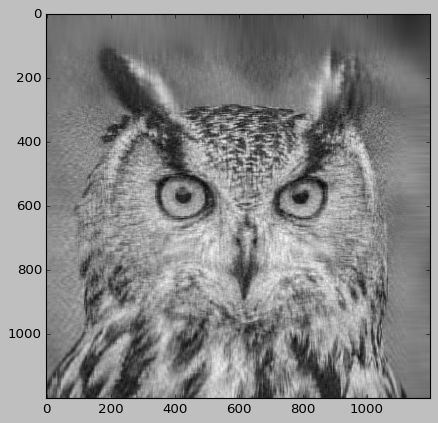

Felicidades la imagen está comprimida
Medio pixeleado, pero con un poco de imaginación sabes que es un búho que está viendo a Lucy


In [131]:
#imagen 1
U1,D1,V1 = np.linalg.svd(imgmat)
imgmat1.shape

nvalue = 50
#------------------------------
reconstimg1 = np.matrix(U1[:,:nvalue])*np.diag(D1[:nvalue])*np.matrix(V1[:nvalue,:])
plt.imshow(reconstimg1,cmap='gray')
plt.show()
print("Felicidades la imagen está comprimida")
print("Medio pixeleado, pero con un poco de imaginación sabes que es un búho que está viendo a Lucy")

[ 3.  4.  5. ... 45. 45. 45.]


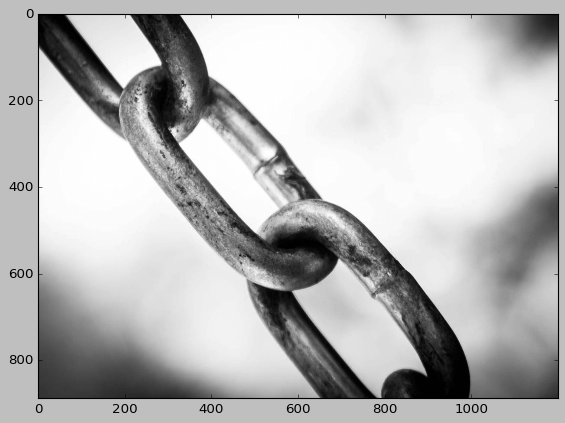

<PIL.Image.Image image mode=LA size=1200x887 at 0x7F8C75738350>
Cadena con la que van a amarrar a Búho si molesta a Lucy


In [133]:
#imagen 2
plt.style.use('classic')
img2 = Image.open(urllib.request.urlopen('https://biblioteca.acropolis.org/wp-content/uploads/2022/10/cadena.jpg')).convert('LA')
imggray2 = img2.convert('LA')
imgmat2 = np.array(list(imggray2.getdata(band=0)),float)

print(imgmat2)

imgmat2.shape = (imggray2.size[1],imggray2.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat2,cmap='gray')
plt.show()
print(img2)
print("Cadena con la que van a amarrar a Búho si molesta a Lucy")

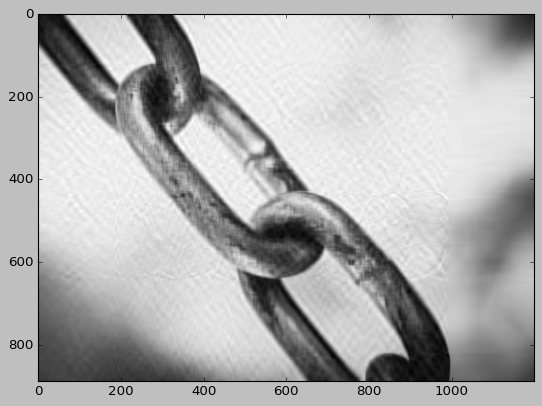

Felicidades la imagen está comprimida


In [134]:
#imagen 2
U2,D2,V2 = np.linalg.svd(imgmat2)
imgmat2.shape

nvalue = 50
#------------------------------
reconstimg2 = np.matrix(U2[:,:nvalue])*np.diag(D2[:nvalue])*np.matrix(V2[:nvalue,:])
plt.imshow(reconstimg2,cmap='gray')
plt.show()
print("Felicidades la imagen está comprimida")

[188. 188. 189. ... 187. 185. 188.]


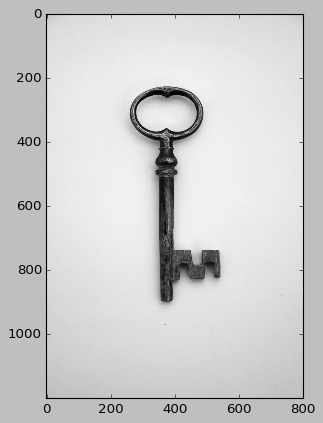

<PIL.Image.Image image mode=LA size=801x1200 at 0x7F8C75C41050>
Llave que quita el candado de la cadena con la que está amarrado Búho después de haber molestado a Lucy


In [136]:
#imagen 3
plt.style.use('classic')
img3 = Image.open(urllib.request.urlopen('https://biblioteca.acropolis.org/wp-content/uploads/2022/09/llave.jpg')).convert('LA')
imggray3 = img3.convert('LA')
imgmat3 = np.array(list(imggray3.getdata(band=0)),float)

print(imgmat3)

imgmat3.shape = (imggray3.size[1],imggray3.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat3,cmap='gray')
plt.show()
print(img3)
print("Llave que quita el candado de la cadena con la que está amarrado Búho después de haber molestado a Lucy")

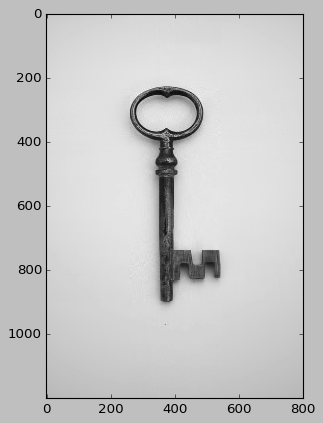

Felicidades la imagen está comprimida
Un buen samaritano encontró la llave del candado de la cadena que tiene Búho


In [138]:
#imagen 3
U3,D3,V3 = np.linalg.svd(imgmat3)
imgmat3.shape

nvalue = 50
#------------------------------
reconstimg3 = np.matrix(U3[:,:nvalue])*np.diag(D3[:nvalue])*np.matrix(V3[:nvalue,:])
plt.imshow(reconstimg3,cmap='gray')
plt.show()
print("Felicidades la imagen está comprimida")
print("Un buen samaritano encontró la llave del candado de la cadena que tiene Búho")

# Ejercicio 3

**Feature importances**

Para este ejercicio, te pediremos que sigas el tutorial de la siguiente pagina:

https://towardsdatascience.com/pca-clearly-explained-how-when-why-to-use-it-and-feature-importance-a-guide-in-python-7c274582c37e




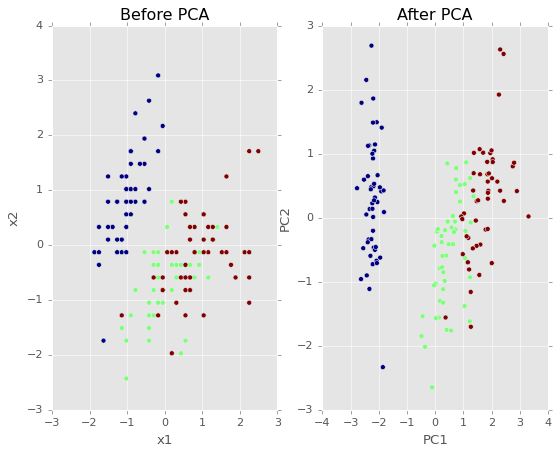

In [139]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler
plt.style.use('ggplot')
# Load the data
iris = datasets.load_iris()
X = iris.data
y = iris.target
# Z-score the features
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
# The PCA model
pca = PCA(n_components=2) # estimate only 2 PCs
X_new = pca.fit_transform(X) # project the original data into the PCA space

fig, axes = plt.subplots(1,2)
axes[0].scatter(X[:,0], X[:,1], c=y)
axes[0].set_xlabel('x1')
axes[0].set_ylabel('x2')
axes[0].set_title('Before PCA')
axes[1].scatter(X_new[:,0], X_new[:,1], c=y)
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
axes[1].set_title('After PCA')
plt.show()

In [113]:
import numpy
print(numpy.shape(X))

(150, 4)


 La muestra tiene 150 observaciones y 4 variables, presumiblemente correspondiente a la longitud y ancho del sépalos y pétalos

In [94]:
print(pca.explained_variance_ratio_)


[0.72962445 0.22850762]


El primer PCA explica la variabilidad del 73% de la muestra, mientras que el segundo explica "tan solo" el 23% restante

In [116]:
#Matriz de covarianza
np.cov(X_new.T)

array([[2.93808505e+00, 5.33928780e-16],
       [5.33928780e-16, 9.20164904e-01]])

In [117]:
pca.explained_variance_

array([2.93808505, 0.9201649 ])

Los valores de la diagonal de la matriz de covarianza (la varianza de X) son los mismos que los eigenvalores de los componentes principales calculados previamente.

In [118]:
print(abs( pca.components_ ))

[[0.52106591 0.26934744 0.5804131  0.56485654]
 [0.37741762 0.92329566 0.02449161 0.06694199]]


El tamaño de la matriz de componentes es [n_componentes = 2, n_features = 4].

El primer componente corresponde a la primera fila de la matriz
Podemos observar que las características 3, 4 y 1, respectivamente son las más importantes en el PC1, mientras que para el PC2 (que explica el 23% de la varianza), las características más importantes son 2 y 1, respectivamente

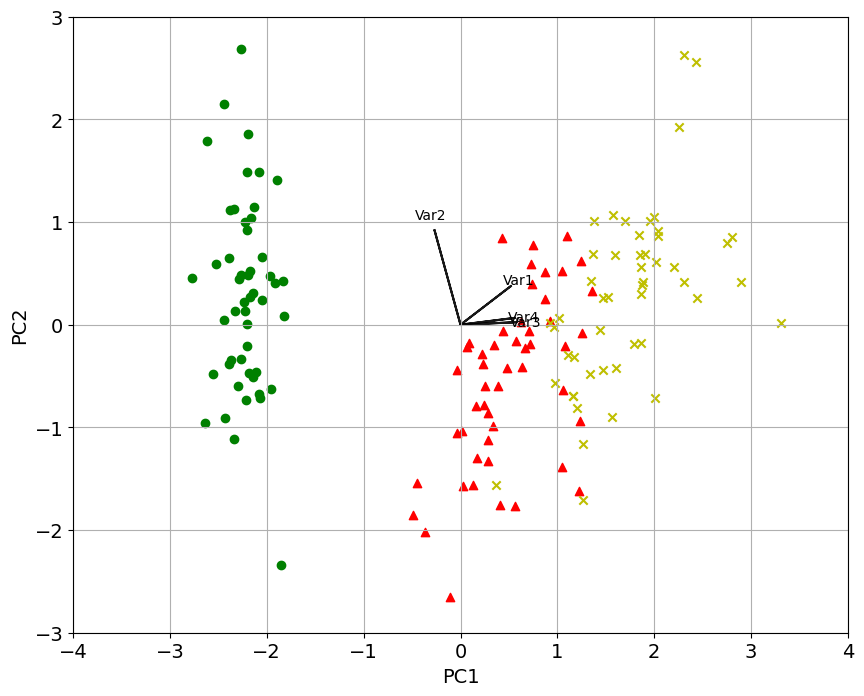

In [120]:
def biplot(score, coeff , y):
    '''
    Author: Serafeim Loukas, serafeim.loukas@epfl.ch
    Inputs:
       score: the projected data
       coeff: the eigenvectors (PCs)
       y: the class labels
   '''
    xs = score[:,0] # projection on PC1
    ys = score[:,1] # projection on PC2
    n = coeff.shape[0] # number of variables
    plt.figure(figsize=(10,8), dpi=100)
    classes = np.unique(y)
    colors = ['g','r','y']
    markers=['o','^','x']
    for s,l in enumerate(classes):
        plt.scatter(xs[y==l],ys[y==l], c = colors[s], marker=markers[s]) # color based on group
    for i in range(n):
        #plot as arrows the variable scores (each variable has a score for PC1 and one for PC2)
        plt.arrow(0, 0, coeff[i,0], coeff[i,1], color = 'k', alpha = 0.9,linestyle = '-',linewidth = 1.5, overhang=0.2)
        plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'k', ha = 'center', va = 'center',fontsize=10)

    plt.xlabel("PC{}".format(1), size=14)
    plt.ylabel("PC{}".format(2), size=14)
    limx= int(xs.max()) + 1
    limy= int(ys.max()) + 1
    plt.xlim([-limx,limx])
    plt.ylim([-limy,limy])
    plt.grid()
    plt.tick_params(axis='both', which='both', labelsize=14)
    
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault) # reset ggplot style
# Call the biplot function for only the first 2 PCs
biplot(X_new[:,0:2], np.transpose(pca.components_[0:2, :]), y)
plt.show()

In [125]:
# Var 3 and Var 4 are extremely positively correlated
print(np.corrcoef(X[:,2], X[:,3])[1,0])

# Var 2and Var 3 are negatively correlated
print(np.corrcoef(X[:,1], X[:,2])[1,0])

0.9628654314027957
-0.42844010433054014


Describe lo relevante del ejercicio y que descubriste de las variables análizadas. 

**¿Qué es feature importance y para que nos sirve?**

Los modelos de Inteñigencia Artificial, especialmente para aprendizaje automático (ML) son más allá de tener un *dataset* lo suficientemente grande (tanto en filas y columnas) como de conocer que librería / herramienta / lenguaje se debe de utilizar para modelar y tratar de rsolver algún problema. El conocimiento y contexto del problema, la base de datos, los procesos de limpieza, transformación, estandarización y selección de variables son la parte más importante para tener un buen modelo. 

La importancia de las características *(feature importance)* consiste en las técnicas matemáticas que calculan y ponderan un nivel de importancia (explicabilidad) de cada una de las variables que están en el dataset. A mayor *score* ==> mayor importancia, es decir, entre mayor sea la importancia, mayor efecto/explicabilidad aportará para el evento que estamos modelando.

El uso de componentes principales (Principal Component Analysis PCA, por sus siglas en inglés) es un método de reducción de dimensiones que permite simplificar el grado de complejidad en la dimensiones del dataset conservando el mayor porcentaje de información posible.

**¿Qué hallazgos fueron los más relevantes durante el análisis del ejercicio?**

En el ejercicio que realizamos, tenemos que cada elemento de la muestra (150 observaciones) tiene 4 características, para este ejercicio no importa el nombre de cada una de las características. Realizar visualizaciones en 2 dimensiones es relativamente fácil, en 3 dimensiones se empieza a complicar, pero 4+ ya es imposible. En nuestro ejercicios vemos como de las 4 características iniciales, después de realizar la transformación obtenemos que el primer componente principal (PCA1), explica ~73% de la variabilidad del dataset, y que dentro de ese componente, las características que mayor peso tienen son: 3, 4 y 1, en ese orden y para el PCA2 (que explica el 23%) las características 2 y 1 son las relevantes.

Usando el método de componentes principales, pasamos de una dimensión de 4 variables originalmente a 2 variables que explican el 96% de la varianza de la base de datos. De acuerdo a la recomendación en el material de apoyo, debemos de quedarnos con el número de componentes que expliquen al menos el 95% de la varianza.

**¿Dónde lo aplicarías o te sería de utilidad este conocimiento?**
1. En la tarea de la maestría de Inteligencia Artifical Aplicada
2. Es aquellos problemas de clasificación, ya sea supervisada o no, donde busquemos reducir variables, perdiendo el menor % de información posible.
3. Profesionalmente lo he usado para reducir variables para la creación de un modelo de riesgos usando información tradicional (principalmente del reporte de buró de crédito) + información referente a la huella telefónica (tipo de plan: prepago o postpago, gama de teléfono: alta, media o baja,...) + información de geolocalización. Originalmente el data set tenía poco más de 800 variables, realizamos enetendimiento, limpieza, imputación, estandarización, reducción de variables (usando PCA), modelado, mejoramiento del modelo y puesta en producción.